In [1]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid, zero
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()


/opt/miniconda3/envs/controls_challenge/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Current Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title(f"Rollout {sim.controller.name}")
  plt.show()

In [2]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=False)
# pid_controllercontroller = pid.Controller()
zero_controller = zero.Controller()

In [3]:
sim = TinyPhysicsSimulator(model, "./data/00001.csv", controller=zero_controller, debug=False)
sim.rollout()
# unpack and get size of FuturePlan 

action from TinyPhySim: -0.1739809197469317
action from TinyPhySim: -0.1753026273334023
action from TinyPhySim: -0.1723849488190324
action from TinyPhySim: -0.1693209145062453
action from TinyPhySim: -0.1709505977855359
action from TinyPhySim: -0.1657139374680883
action from TinyPhySim: -0.1684410313390054
action from TinyPhySim: -0.1638571428152325
action from TinyPhySim: -0.1517588686247896
action from TinyPhySim: -0.132229135867851
action from TinyPhySim: -0.1308063616594867
action from TinyPhySim: -0.1244137681359325
action from TinyPhySim: -0.1029989461954719
action from TinyPhySim: -0.1008647358857444
action from TinyPhySim: -0.0992797749037075
action from TinyPhySim: -0.0930962571915726
action from TinyPhySim: -0.0937182918178598
action from TinyPhySim: -0.0914309008594382
action from TinyPhySim: -0.0920033768505638
action from TinyPhySim: -0.0879746631847569
action from TinyPhySim: -0.087540605350624
action from TinyPhySim: -0.0875745786263548
action from TinyPhySim: -0.0885853

{'lataccel_cost': 4.516093744426455,
 'jerk_cost': 5.939194085512951,
 'total_cost': 231.7438813068357}

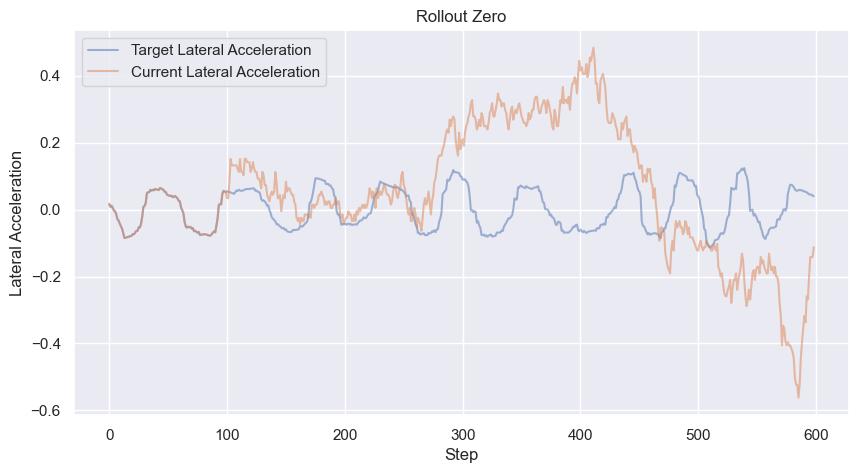

In [6]:
plot_rollout(sim)

In [7]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=False)
pid_controller = pid.Controller()
# controller = zero.Controller()

In [8]:
sim = TinyPhysicsSimulator(model, "./data/00001.csv", controller=pid_controller, debug=False)
sim.rollout()

action from TinyPhySim: -0.1739809197469317
action from TinyPhySim: -0.1753026273334023
action from TinyPhySim: -0.1723849488190324
action from TinyPhySim: -0.1693209145062453
action from TinyPhySim: -0.1709505977855359
action from TinyPhySim: -0.1657139374680883
action from TinyPhySim: -0.1684410313390054
action from TinyPhySim: -0.1638571428152325
action from TinyPhySim: -0.1517588686247896
action from TinyPhySim: -0.132229135867851
action from TinyPhySim: -0.1308063616594867
action from TinyPhySim: -0.1244137681359325
action from TinyPhySim: -0.1029989461954719
action from TinyPhySim: -0.1008647358857444
action from TinyPhySim: -0.0992797749037075
action from TinyPhySim: -0.0930962571915726
action from TinyPhySim: -0.0937182918178598
action from TinyPhySim: -0.0914309008594382
action from TinyPhySim: -0.0920033768505638
action from TinyPhySim: -0.0879746631847569
action from TinyPhySim: -0.087540605350624
action from TinyPhySim: -0.0875745786263548
action from TinyPhySim: -0.0885853

{'lataccel_cost': 0.29865109656435407,
 'jerk_cost': 7.069556830820253,
 'total_cost': 22.002111659037958}

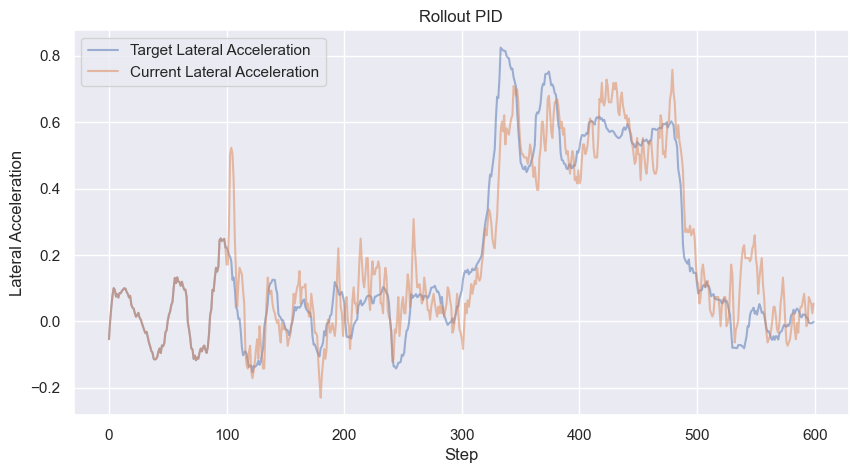

In [11]:
plot_rollout(sim)

In [9]:
sim = TinyPhysicsSimulator(model, "./data/00002.csv", controller=pid_controller, debug=False)
len(sim.data)

600

In [10]:
sim.rollout()

action from TinyPhySim: -0.0924287493882858
action from TinyPhySim: -0.0998858253893149
action from TinyPhySim: -0.1057395268581195
action from TinyPhySim: -0.1042421465765483
action from TinyPhySim: -0.1022047856601313
action from TinyPhySim: -0.1106405180043117
action from TinyPhySim: -0.1136694083492659
action from TinyPhySim: -0.1199651814275583
action from TinyPhySim: -0.1255346174194085
action from TinyPhySim: -0.1310089768372424
action from TinyPhySim: -0.1361349201753815
action from TinyPhySim: -0.1346999793262073
action from TinyPhySim: -0.1443796769299705
action from TinyPhySim: -0.1529773799571902
action from TinyPhySim: -0.1589139628300994
action from TinyPhySim: -0.1649466390781064
action from TinyPhySim: -0.1658657511231114
action from TinyPhySim: -0.1743871860647958
action from TinyPhySim: -0.1765651402474283
action from TinyPhySim: -0.1765546800833654
action from TinyPhySim: -0.1744355308727264
action from TinyPhySim: -0.1670785954181593
action from TinyPhySim: -0.16207

{'lataccel_cost': 1.0654250001934145,
 'jerk_cost': 24.470437566843334,
 'total_cost': 77.74168757651405}

In [ ]:
sim.step_idx